In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 4)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## 품질 및 효율의 관계/패턴

In [3]:
qual = pd.read_csv("자동배차_품질_2019_12_02.csv", index_col=0)
effic = pd.read_csv("자동배차_효율_2019_12_02.csv", index_col=0)

In [4]:
df = pd.concat([qual, effic], axis=1)

In [5]:
df.head()

,dlvry_cnt,uniq_rider_cnt,dlvry_cnt_per_rider,intime_target_ratio,intime_guide_ratio,intime_35_ratio,mae_target,mae_pred,dlvry_minute,dlvry_dist_line_km,dlvry_dist_fastest_km,mean_reg_to_consign_minute,mean_consign_to_arrived_minute,mean_arrived_to_pickup_minute,mean_pickup_to_handover_minute,dlvry_cnt,rider_cnt,working_time_hour,dlvry_cnt_per_hour
business_day,,,,,,,,,,,,,,,,,,,
2019-09-01,45263,1320,34,75.9,91.1,53.6,12.8,10.1924,36.0,1.28,1.58,3.2,17.7,3.9,11.3,45263,1320,11951.7,3.8
2019-09-02,29488,1211,24,82.0,93.9,63.2,13.6,9.4191,32.8,1.24,1.54,2.2,16.4,3.5,10.7,29488,1211,9757.6,3.0
2019-09-03,30968,1257,24,82.4,93.8,61.4,14.3,9.6339,33.5,1.24,1.54,2.4,16.6,3.6,10.9,30968,1257,10326.7,3.0
2019-09-04,29460,1148,25,69.0,84.9,61.9,12.1,10.3952,34.2,1.23,1.53,4.1,15.6,3.5,11.0,29460,1148,9738.4,3.0
2019-09-05,31617,1249,25,63.3,82.3,60.8,10.8,10.3383,34.6,1.25,1.56,4.2,15.8,3.4,11.2,31617,1249,10284.3,3.1


In [6]:
len(df)

90

In [5]:
df['intime_target_ratio'].describe()

count    90.0000
mean     65.9833
std       4.9176
min      48.8000
25%      62.8500
50%      66.5000
75%      68.9500
max      82.4000
Name: intime_target_ratio, dtype: float64

In [6]:
df['intime_guide_ratio'].describe()

count    90.0000
mean     89.5022
std       3.3452
min      78.6000
25%      88.2750
50%      90.5500
75%      91.8000
max      94.1000
Name: intime_guide_ratio, dtype: float64

In [7]:
df['dlvry_cnt_per_hour'].describe()

count    90.0000
mean      2.8378
std       0.3262
min       2.4000
25%       2.6000
50%       2.7000
75%       3.0000
max       3.8000
Name: dlvry_cnt_per_hour, dtype: float64

In [8]:
df[['intime_guide_ratio', 'dlvry_cnt_per_hour']].corr()

,intime_guide_ratio,dlvry_cnt_per_hour
intime_guide_ratio,1.0000,-0.5862
dlvry_cnt_per_hour,-0.5862,1.0000


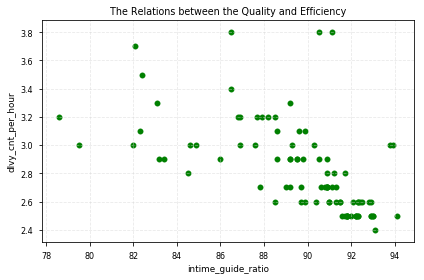

In [9]:
plt.scatter(df['intime_guide_ratio'], df['dlvry_cnt_per_hour'], color='green')

plt.title("The Relations between the Quality and Efficiency")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.xlabel("intime_guide_ratio")
plt.ylabel("dlvy_cnt_per_hour")
plt.tight_layout()

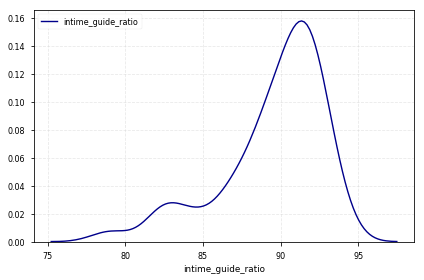

In [10]:
sns.distplot(df['intime_guide_ratio'], rug=False, hist=False, kde=True, color='darkblue', label='intime_guide_ratio')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

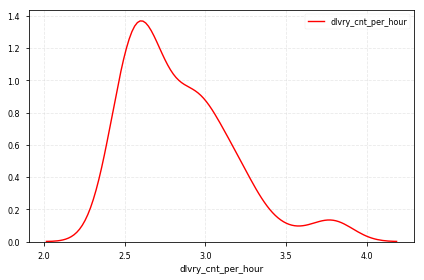

In [11]:
sns.distplot(df['dlvry_cnt_per_hour'], rug=False, hist=False, kde=True, color='red', label='dlvry_cnt_per_hour')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

## 시급 분포

In [34]:
salary = pd.read_csv("자동배차_시급분포_추출용_2019_12_04.csv", index_col=0)

In [35]:
salary.head()

,rider_user_id,rider_type,dlvry_cnt,working_time_hour,revenue,rev_per_hour,rev_per_cnt
business_day,,,,,,,
2019-11-24,442400,INDIVIDUAL_OWNER,100,13.5,517500,38333.3,5175
2019-11-24,BC22320,CROWDSOURCING,13,7.9,66000,8354.4,5076
2019-11-29,4069,INDIVIDUAL_OWNER,39,11.7,205500,17564.1,5269
2019-11-29,BC5533,CROWDSOURCING,20,8.5,95500,11235.3,4775
2019-11-18,BC5783,CROWDSOURCING,8,4.2,29600,7047.6,3700


In [38]:
# 라이더 타입별 시급 분포
salary.groupby("rider_type")['rev_per_hour'].describe().T

rider_type,CROWDSOURCING,INDIVIDUAL_OWNER
count,49761.0000,44625.0000
mean,12307.4910,15469.2340
std,5055.4782,5565.0935
min,605.8000,800.0000
25%,8717.9000,11500.0000
50%,12121.2000,15304.3000
75%,15625.0000,19000.0000
max,50000.0000,55000.0000


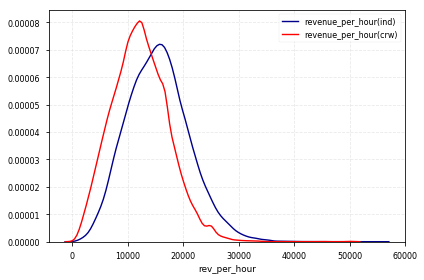

In [44]:
# 라이더 타입별 시급 분포

sns.distplot(salary.query("rider_type == 'INDIVIDUAL_OWNER'")['rev_per_hour'], rug=False, hist=False, kde=True, color='darkblue', label='revenue_per_hour(ind)')
sns.distplot(salary.query("rider_type == 'CROWDSOURCING'")['rev_per_hour'], rug=False, hist=False, kde=True, color='red', label='revenue_per_hour(crw)')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [39]:
# 라이더 타입별 건당수익 분포
salary.groupby("rider_type")['rev_per_cnt'].describe().T

rider_type,CROWDSOURCING,INDIVIDUAL_OWNER
count,49761.0000,44625.0000
mean,4977.6448,5029.7791
std,534.2769,954.2616
min,2500.0000,2500.0000
25%,4925.0000,4900.0000
50%,5000.0000,5187.0000
75%,5174.0000,5453.0000
max,8500.0000,10500.0000


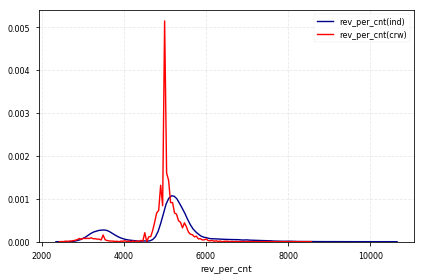

In [73]:
sns.distplot(salary.query("rider_type == 'INDIVIDUAL_OWNER'")['rev_per_cnt'], rug=False, hist=False, kde=True, color='darkblue', label='rev_per_cnt(ind)')
sns.distplot(salary.query("rider_type == 'CROWDSOURCING'")['rev_per_cnt'], rug=False, hist=False, kde=True, color='red', label='rev_per_cnt(crw)')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

## 변동계수 (품질)

In [12]:
std = np.std(df['intime_guide_ratio'])
mean = df['intime_guide_ratio'].mean()

In [13]:
print(std)
print(mean)

3.3265924433195337
89.50222222222222


In [14]:
std/mean * 100

3.71677078035006

In [15]:
df1 = df[['intime_guide_ratio']].copy()

In [63]:
df1.head(10)

,intime_guide_ratio
business_day,
2019-09-01,91.1
2019-09-02,93.9
2019-09-03,93.8
2019-09-04,84.9
2019-09-05,82.3
2019-09-06,86.0
2019-09-07,83.1
2019-09-08,82.4
2019-09-09,89.0


In [62]:
# # raw
# df1.intime_guide_ratio.plot(color='darkblue')

# plt.title("Intime_guide_ratio daily")
# plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
# plt.tight_layout()

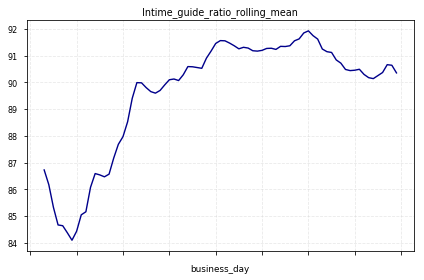

In [56]:
# rolling
df1.rolling(14)["intime_guide_ratio"].mean().plot(color='darkblue')

plt.title("Intime_guide_ratio_rolling_mean")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

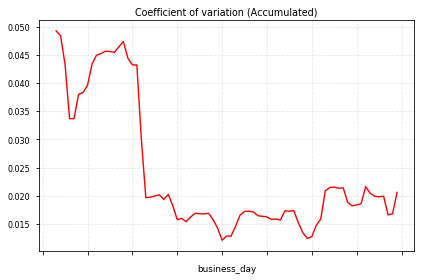

In [71]:
# rolling, COV
df1.rolling(14)["intime_guide_ratio"].apply(lambda x: x.std() / x.mean()).plot(color='red')

plt.title("Coefficient of variation (Accumulated)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [66]:
df1.rolling(14)["intime_guide_ratio"].mean().dropna()[:20]

business_day
2019-09-16    86.7286
2019-09-17    86.1786
2019-09-18    85.3286
2019-09-19    84.6714
2019-09-20    84.6429
2019-09-21    84.3786
2019-09-22    84.1000
2019-09-23    84.4357
2019-09-24    85.0500
2019-09-25    85.1643
2019-09-26    86.0786
2019-09-27    86.5929
2019-09-28    86.5429
2019-09-29    86.4714
2019-09-30    86.5714
2019-10-01    87.1714
2019-10-02    87.6857
2019-10-03    87.9714
2019-10-04    88.5286
2019-10-05    89.4071
Name: intime_guide_ratio, dtype: float64

In [70]:
df1.rolling(14)["intime_guide_ratio"].apply(lambda x: x.std() / x.mean()).dropna()[:20]

business_day
2019-09-16    0.0493
2019-09-17    0.0484
2019-09-18    0.0433
2019-09-19    0.0337
2019-09-20    0.0337
2019-09-21    0.0380
2019-09-22    0.0383
2019-09-23    0.0396
2019-09-24    0.0433
2019-09-25    0.0449
2019-09-26    0.0452
2019-09-27    0.0457
2019-09-28    0.0456
2019-09-29    0.0454
2019-09-30    0.0465
2019-10-01    0.0474
2019-10-02    0.0444
2019-10-03    0.0432
2019-10-04    0.0432
2019-10-05    0.0301
Name: intime_guide_ratio, dtype: float64